In [1]:
import numpy as np
import pandas as pd
import ast
from tqdm import tqdm
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

from creative import *

c:\Users\Justin\Documents\JKU\2024WS\multimedia-search-and-retrieval\.venv\Lib\site-packages\tqdm_joblib\__init__.py:4: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
infos = pd.read_csv('dataset/id_information_mmsr.tsv', sep='\t')
metadata = pd.read_csv('dataset/id_metadata_mmsr.tsv', sep='\t')
tags = pd.read_csv('dataset/id_tags_dict.tsv', sep='\t')
genres_base = pd.read_csv('dataset/top_genres.tsv', sep='\t')

In [3]:
# Count occurrences of each artist
artist_counts = infos['artist'].value_counts()

filered_artist = artist_counts[artist_counts > 9]

# Plot the histogram
plt.figure(figsize=(10, 6))
filered_artist.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f'Artist Histogram of more then 9 songs ({len(filered_artist)})', fontsize=16)
plt.xlabel('Artist', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

In [4]:
genres = genres_base.copy()
genres['top_genre'] = genres_base['top_genre'].apply(ast.literal_eval)
exp_genres = genres.explode('top_genre').reset_index(drop=True)
genre_amount = exp_genres['top_genre'].value_counts()
unique_genres_amount = len(list(set(list(genre_amount))))

threshold = 50
filtered_genre_counts = genre_amount[genre_amount >= threshold]

plt.figure(figsize=(10, 6))
filtered_genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Histogram of Genres', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

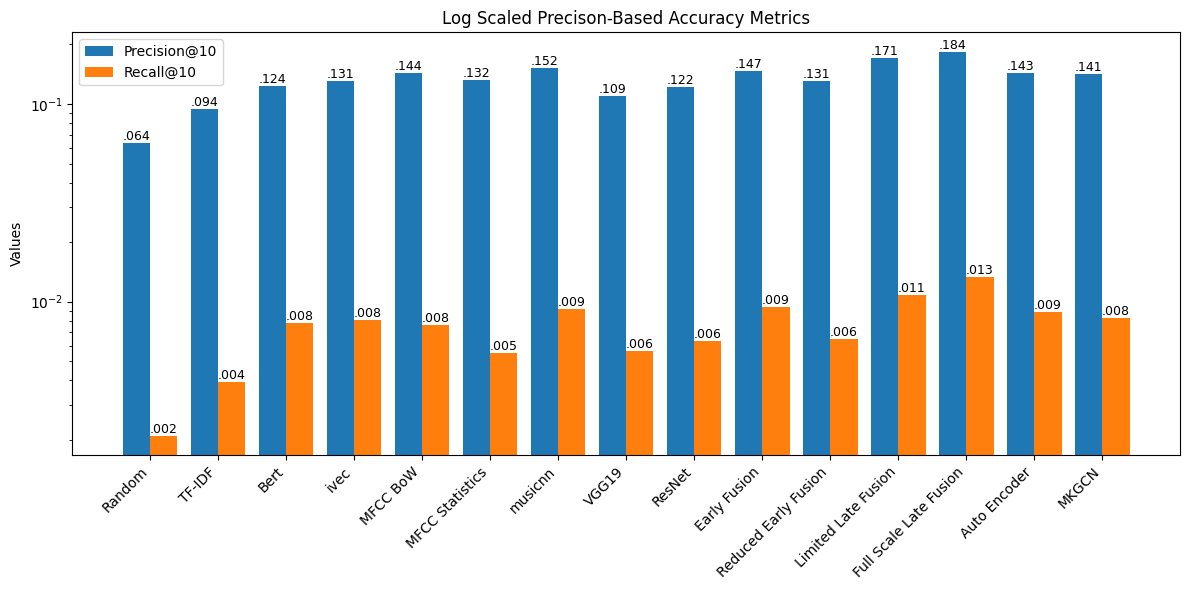

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

results = pd.read_csv("./results/base_accuracy_at_10_th_0.csv")

models = ['Random', 'TF-IDF', 'Bert', 'ivec', 'MFCC BoW', 'MFCC Statistics', 'musicnn', 'VGG19', 'ResNet', 'Early Fusion', 'Reduced Early Fusion', 'Limited Late Fusion', 'Full Scale Late Fusion', 'Auto Encoder', 'MKGCN']

values = results[['precision@10', 'recall@10']].values

categories = ['Precision@10', 'Recall@10']

# Bar Chart
x = np.arange(len(models))
width = 0.4

fig, ax = plt.subplots(figsize=(12, 6))

for i in range(len(categories)):
    bars = ax.bar(x + i * width, values[:, i], width, label=categories[i])
    
    # Annotate bars with correct values
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}'.lstrip('0'), 
                ha='center', va='bottom', fontsize=9)

ax.set_xticks(x + width / 2)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylabel("Values")
ax.set_title("Log Scaled Precison-Based Accuracy Metrics")
ax.set_yscale('log')
ax.legend()

plt.tight_layout()
plt.show()

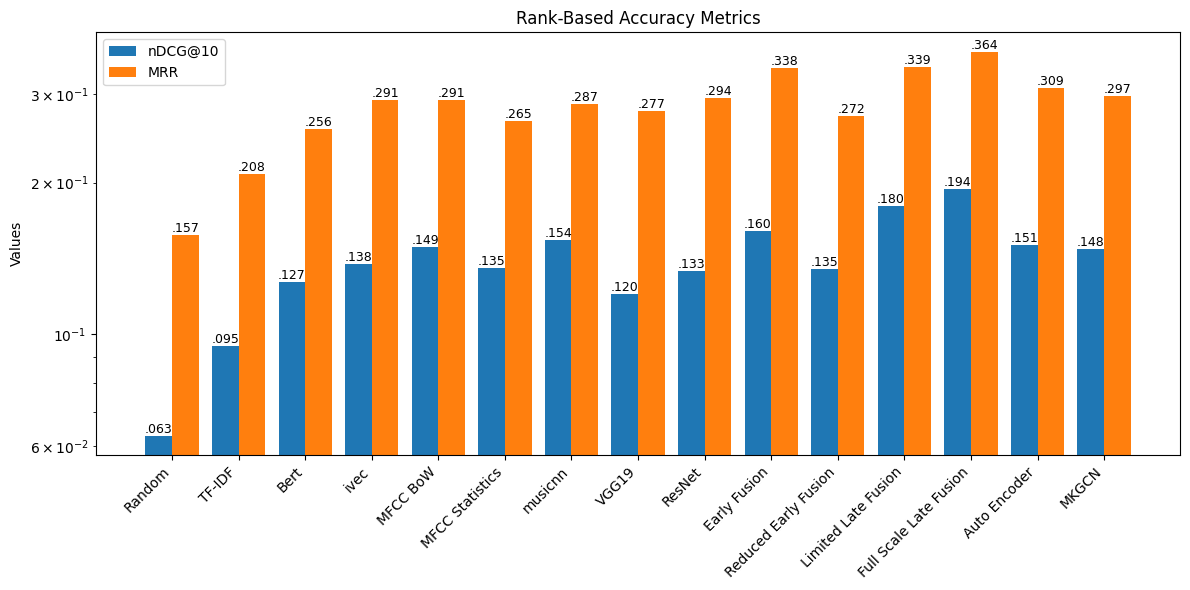

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

results = pd.read_csv("./results/base_accuracy_at_10_th_0.csv")

models = ['Random', 'TF-IDF', 'Bert', 'ivec', 'MFCC BoW', 'MFCC Statistics', 'musicnn', 'VGG19', 'ResNet', 'Early Fusion', 'Reduced Early Fusion', 'Limited Late Fusion', 'Full Scale Late Fusion', 'Auto Encoder', 'MKGCN']

values = results[['ndcg@10', 'mrr']].values

categories = ['nDCG@10', 'MRR']

# Bar Chart
x = np.arange(len(models))
width = 0.4

fig, ax = plt.subplots(figsize=(12, 6))

for i in range(len(categories)):
    bars = ax.bar(x + i * width, values[:, i], width, label=categories[i])
    
    # Annotate bars with correct values
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}'.lstrip('0'), 
                ha='center', va='bottom', fontsize=9)

ax.set_xticks(x + width / 2)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylabel("Values")
ax.set_title("Rank-Based Accuracy Metrics")
ax.set_yscale('log')
ax.legend()

plt.tight_layout()
plt.show()

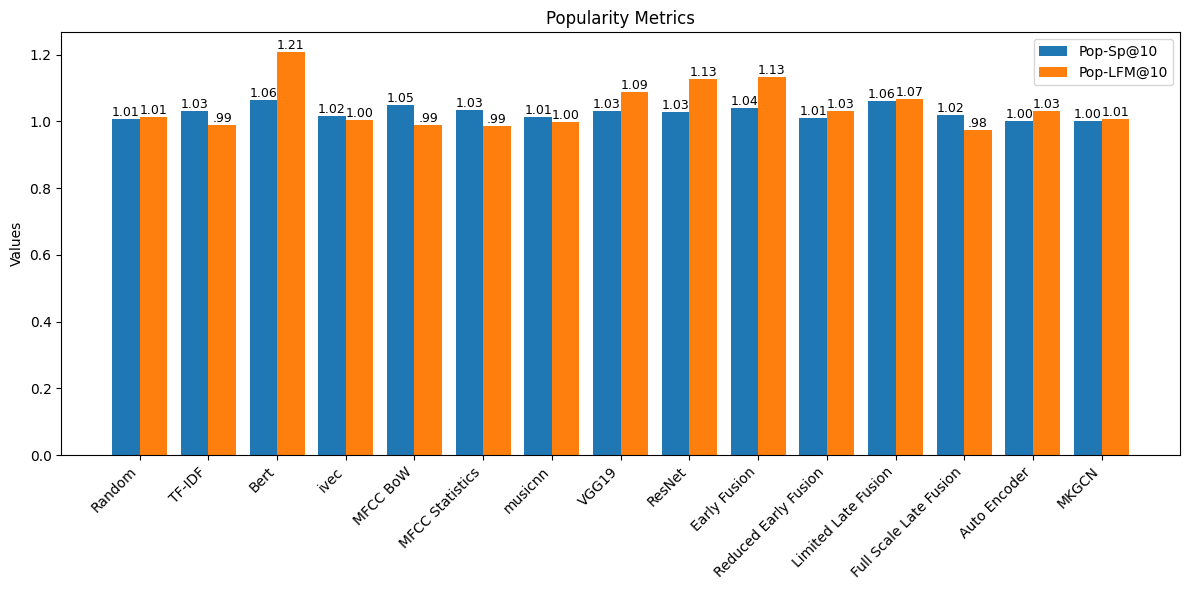

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load Data
results = pd.read_csv("./results/base_beyond_at_10_th_0.csv")

# Define Models and Metrics
models = ['Random', 'TF-IDF', 'Bert', 'ivec', 'MFCC BoW', 'MFCC Statistics', 'musicnn', 'VGG19', 
          'ResNet', 'Early Fusion', 'Reduced Early Fusion', 'Limited Late Fusion', 
          'Full Scale Late Fusion', 'Auto Encoder', 'MKGCN']

values = results[['pop-sp@10', 'pop-lfm@10']].values
categories = ['Pop-Sp@10', 'Pop-LFM@10']
# Bar Chart
x = np.arange(len(models))
width = 0.4

fig, ax = plt.subplots(figsize=(12, 6))

for i in range(len(categories)):
    bars = ax.bar(x + i * width, values[:, i], width, label=categories[i])
    
    # Annotate bars with correct values
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}'.lstrip('0'), 
                ha='center', va='bottom', fontsize=9)

ax.set_xticks(x + width / 2)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylabel("Values")
ax.set_title("Popularity Metrics")
#ax.set_yscale('log')
ax.legend()

plt.tight_layout()
plt.show()


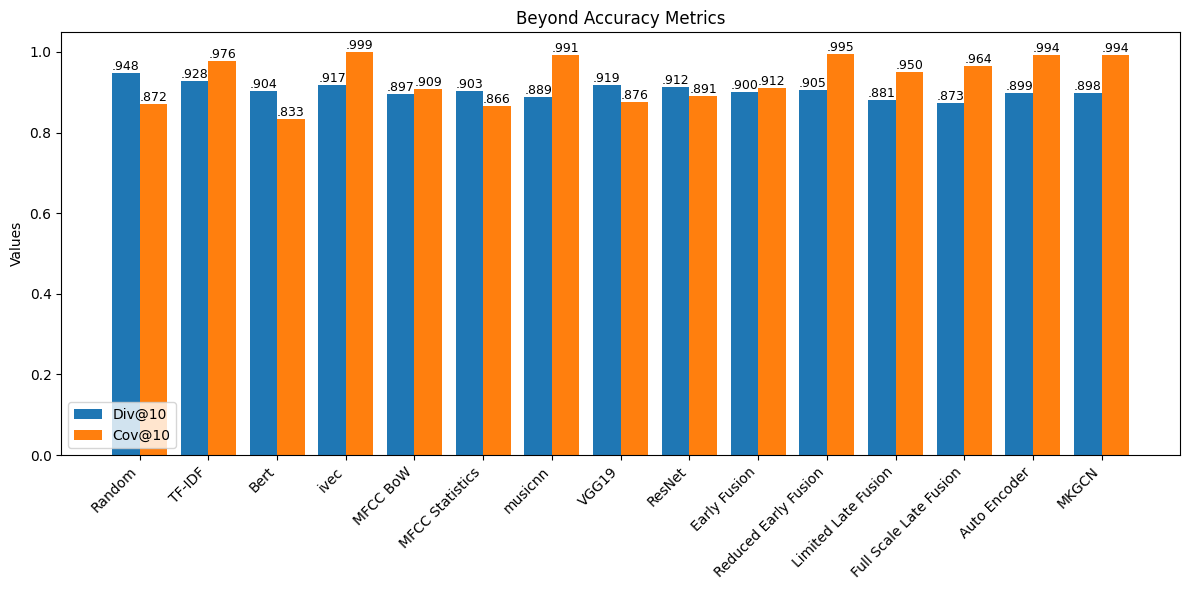

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load Data
results = pd.read_csv("./results/base_beyond_at_10_th_0.csv")

# Define Models and Metrics
models = ['Random', 'TF-IDF', 'Bert', 'ivec', 'MFCC BoW', 'MFCC Statistics', 'musicnn', 'VGG19', 
          'ResNet', 'Early Fusion', 'Reduced Early Fusion', 'Limited Late Fusion', 
          'Full Scale Late Fusion', 'Auto Encoder', 'MKGCN']

values = results[['div@10', 'cov@10']].values
categories = ['Div@10', 'Cov@10']
# Bar Chart
x = np.arange(len(models))
width = 0.4

fig, ax = plt.subplots(figsize=(12, 6))

for i in range(len(categories)):
    bars = ax.bar(x + i * width, values[:, i], width, label=categories[i])
    
    # Annotate bars with correct values
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}'.lstrip('0'), 
                ha='center', va='bottom', fontsize=9)

ax.set_xticks(x + width / 2)
ax.set_xticklabels(models, rotation=45, ha='right')
ax.set_ylabel("Values")
ax.set_title("Beyond Accuracy Metrics")
#ax.set_yscale('log')
ax.legend(loc='lower left')

plt.tight_layout()
plt.show()


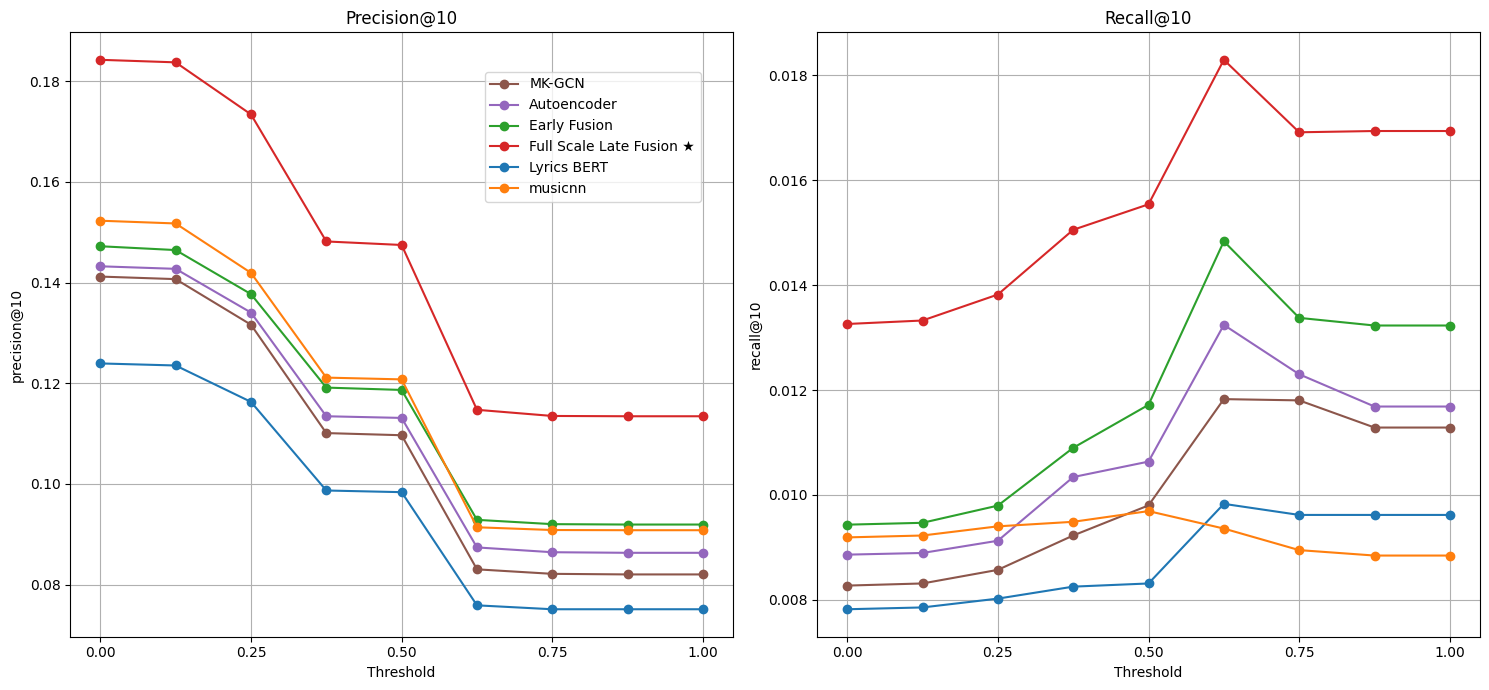

In [113]:
data = pd.read_csv("./results/base_accuracy_at_10_all_th.csv")

model_names = {
    'lyrics_bert': 'Lyrics BERT',
    'musicnn': 'musicnn',
    'early_fusion': 'Early Fusion',
    'late_fusion': 'Full Scale Late Fusion ★',
    'auto_enc': 'Autoencoder',
    'MKGCN': 'MK-GCN'
}

columns = ["model", "threshold", "recall@10", "precision@10", "ndcg@10", "mrr"]
df = pd.DataFrame(data, columns=columns)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
metrics = ['precision@10', 'recall@10']#, 'ndcg@10', 'mrr']
titles = [ 'Precision@10', 'Recall@10']#, 'NDCG@10', 'MRR']

# Assign distinct colors to each model
models = df['model'].unique()
colors = plt.cm.tab10.colors[:len(models)]
model_color = {model: colors[i] for i, model in enumerate(models)}

# Plot each metric in its subplot
for i, metric in enumerate(metrics):
    ax = axs[i%2]
    for model, group in df.groupby('model'):
        sorted_group = group.sort_values('threshold')  # Sort by ascending threshold
        ax.plot(sorted_group['threshold'], sorted_group[metric], 
                label=model_names.get(model, model), color=model_color[model], marker='o')
    ax.set_title(titles[i])
    ax.set_xlabel('Threshold')
    ax.set_ylabel(metric)
    ax.grid(True)
    ax.set_xticks([0.0, 0.25, 0.5, 0.75, 1.0])  # Set clear x-axis ticks

# Add a shared legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.475, 0.9))

plt.tight_layout()
plt.show()

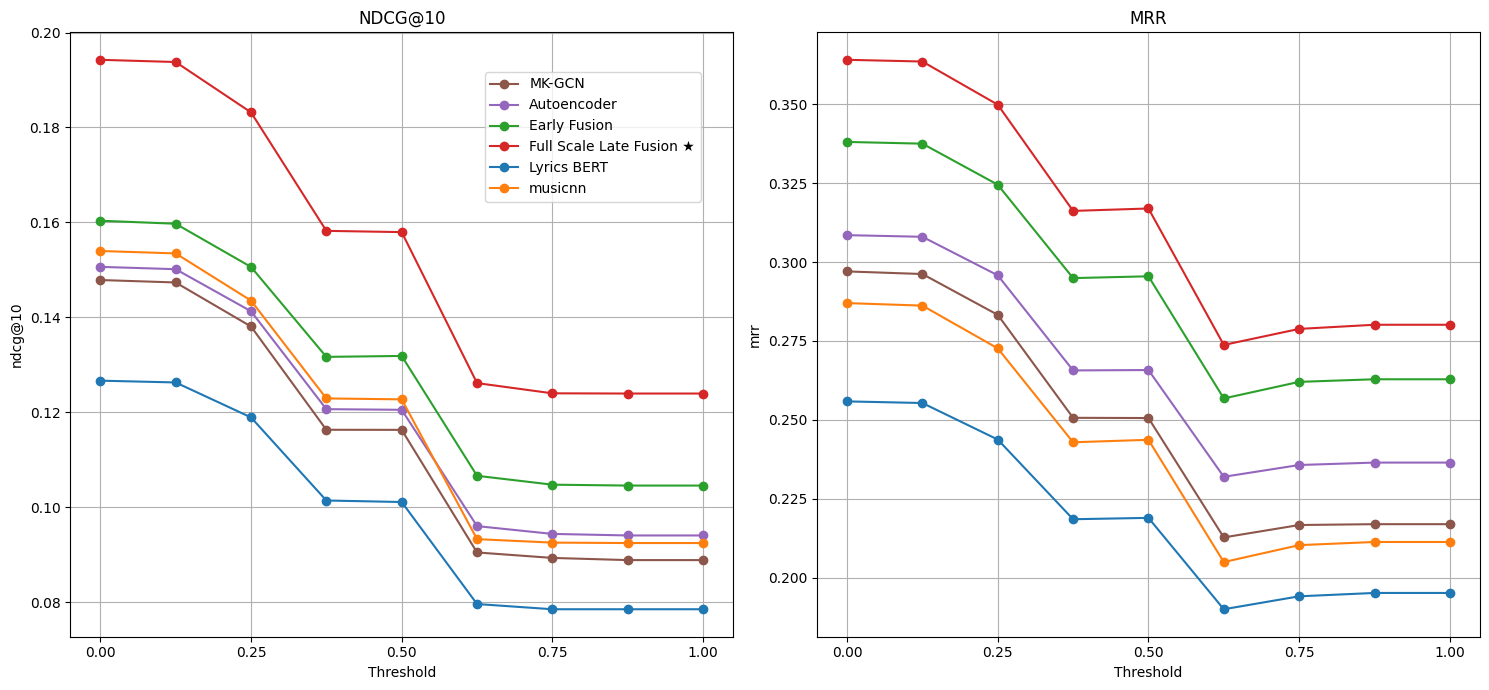

In [114]:
data = pd.read_csv("./results/base_accuracy_at_10_all_th.csv")

columns = ["model", "threshold", "recall@10", "precision@10", "ndcg@10", "mrr"]
df = pd.DataFrame(data, columns=columns)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
metrics = ['ndcg@10', 'mrr']
titles = [ 'NDCG@10', 'MRR']

# Assign distinct colors to each model
models = df['model'].unique()
colors = plt.cm.tab10.colors[:len(models)]
model_color = {model: colors[i] for i, model in enumerate(models)}

# Plot each metric in its subplot
for i, metric in enumerate(metrics):
    ax = axs[i%2]
    for model, group in df.groupby('model'):
        sorted_group = group.sort_values('threshold')  # Sort by ascending threshold
        ax.plot(sorted_group['threshold'], sorted_group[metric], 
                label=model_names.get(model, model), color=model_color[model], marker='o')
    ax.set_title(titles[i])
    ax.set_xlabel('Threshold')
    ax.set_ylabel(metric)
    ax.grid(True)
    ax.set_xticks([0.0, 0.25, 0.5, 0.75, 1.0])  # Set clear x-axis ticks

# Add a shared legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.475, 0.9))

plt.tight_layout()
plt.show()

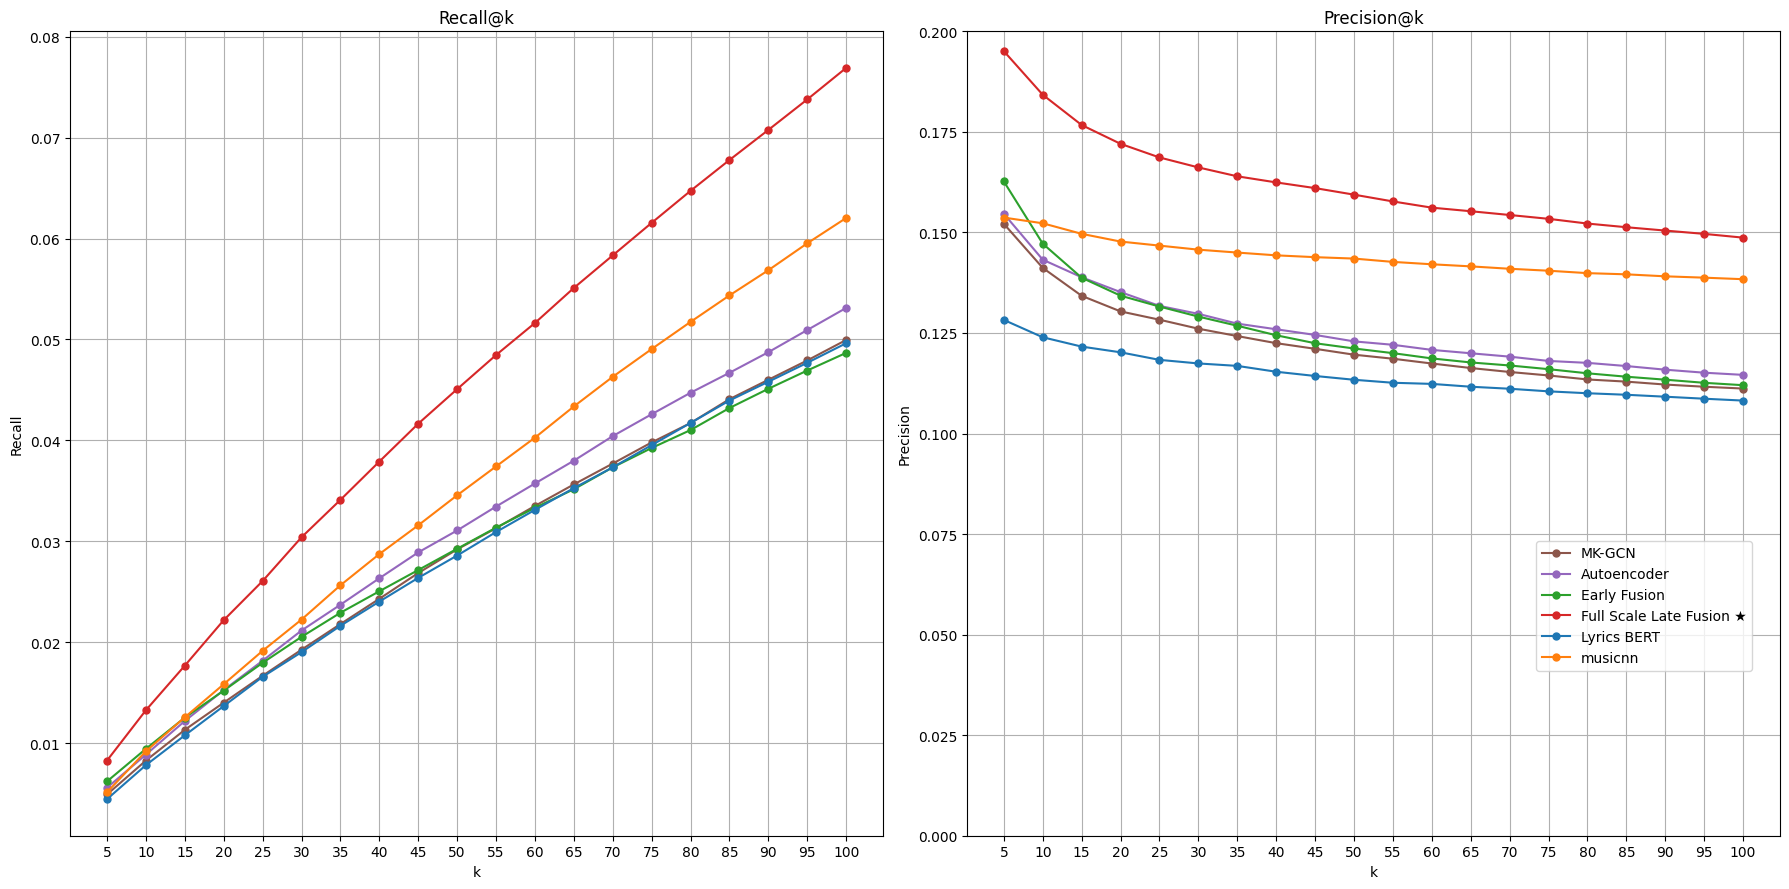

In [129]:
data = pd.read_csv("./results/base_accuracy_all_k_th_0.csv")

columns = ["model", "threshold", "recall", "precision", "ndcg"]
df = pd.DataFrame(data, columns=columns)

# Create 1x3 subplots for the three metrics
fig, axs = plt.subplots(1, 2, figsize=(18, 9))
metrics = ['recall', 'precision'] #'ndcg']
titles = ['Recall@k', 'Precision@k'] #'NDCG@k']

# Assign distinct colors to each model
models = df['model'].unique()
colors = plt.cm.tab10.colors[:len(models)]
model_color = {model: colors[i] for i, model in enumerate(models)}

# Plot each metric in its subplot
for i, metric in enumerate(metrics):
    ax = axs[i]
    for model, group in df.groupby('model'):
        sorted_group = group.sort_values('threshold')
        ax.plot(sorted_group['threshold'], sorted_group[metric], 
                label=model_names.get(model, model), color=model_color[model], marker='o', markersize=5)
    
    ax.set_title(titles[i])
    ax.set_xlabel('k')
    ax.grid()
    ax.set_ylabel(metric.capitalize())
    ax.set_xticks(np.linspace(5, 100, 20, dtype=int))
    
    # Special handling for precision's NaN at k=0
    if metric == 'precision':
        ax.set_ylim(0, 0.2)  # Adjust based on your data range

# Add legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.98, 0.4))

plt.tight_layout()
plt.show()

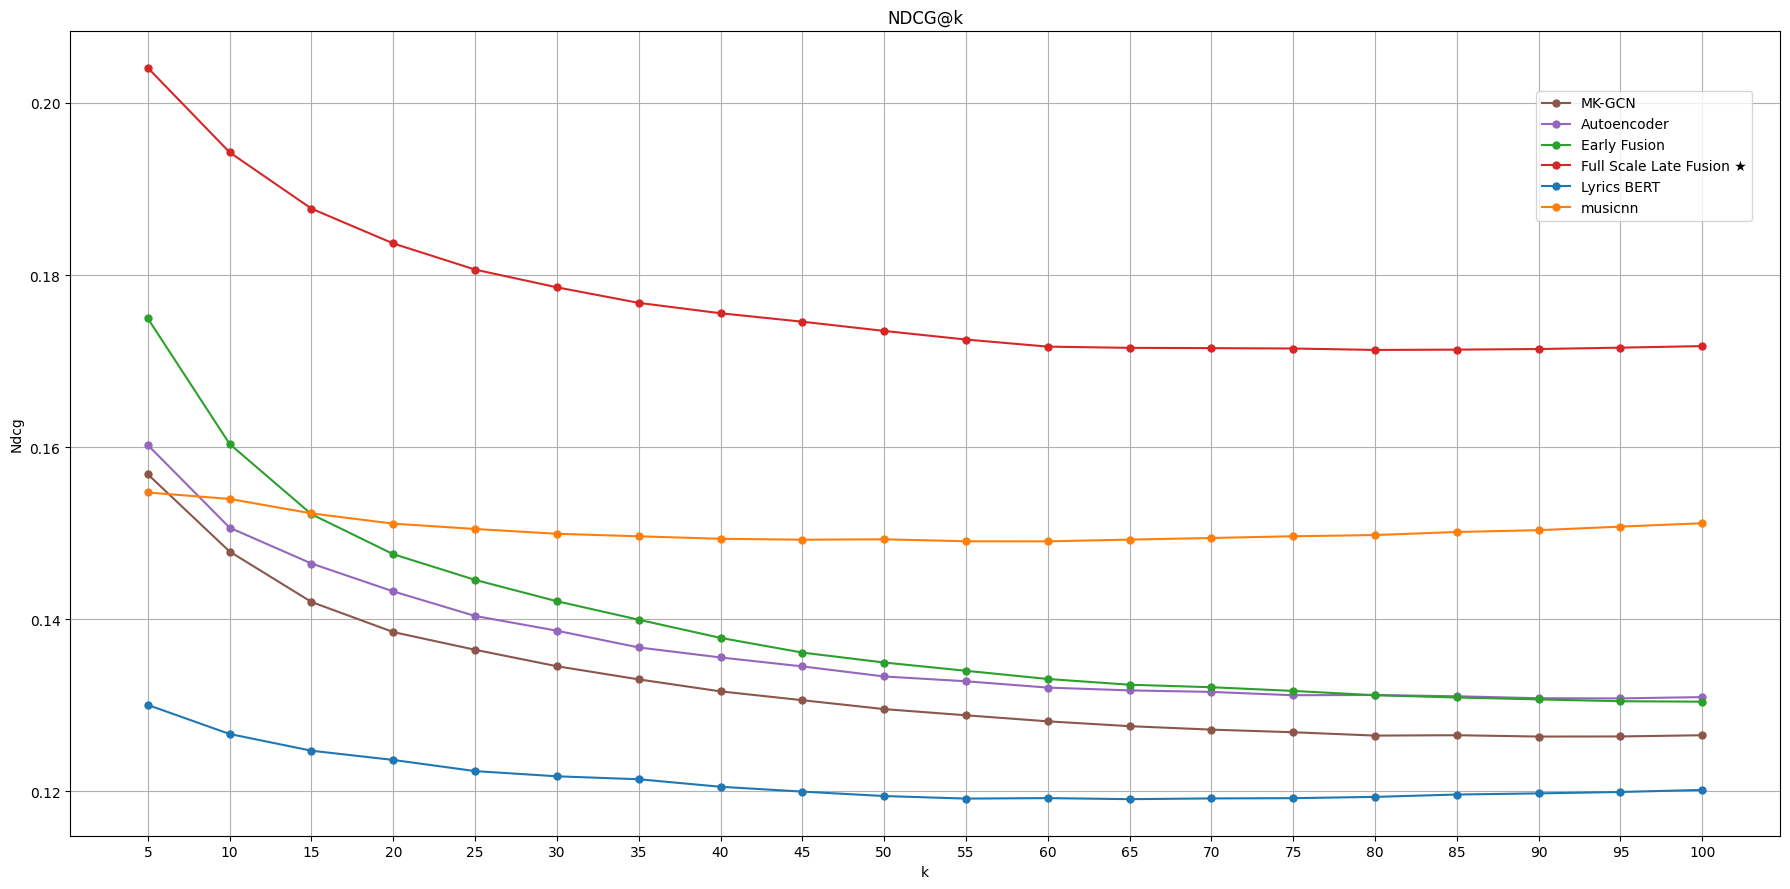

In [133]:
columns = ["model", "threshold", "recall", "precision", "ndcg"]
df = pd.DataFrame(data, columns=columns)

# Create 1x3 subplots for the three metrics
fig, axs = plt.subplots(figsize=(18, 9))
metrics = ['ndcg']
titles = ['NDCG@k']

# Assign distinct colors to each model
models = df['model'].unique()
colors = plt.cm.tab10.colors[:len(models)]
model_color = {model: colors[i] for i, model in enumerate(models)}

# Plot each metric in its subplot
for i, metric in enumerate(metrics):
    for model, group in df.groupby('model'):
        sorted_group = group.sort_values('threshold')
        axs.plot(sorted_group['threshold'], sorted_group[metric], 
                label=model_names.get(model, model), color=model_color[model], marker='o', markersize=5)
    
    axs.set_title(titles[i])
    axs.set_xlabel('k')
    axs.grid()
    axs.set_ylabel(metric.capitalize())
    axs.set_xticks(np.linspace(5, 100, 20, dtype=int))
    
    # Special handling for precision's NaN at k=0
    if metric == 'precision':
        axs.set_ylim(0, 0.2)  # Adjust based on your data range

# Add legend
handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.98, 0.9))

plt.tight_layout()
plt.show()

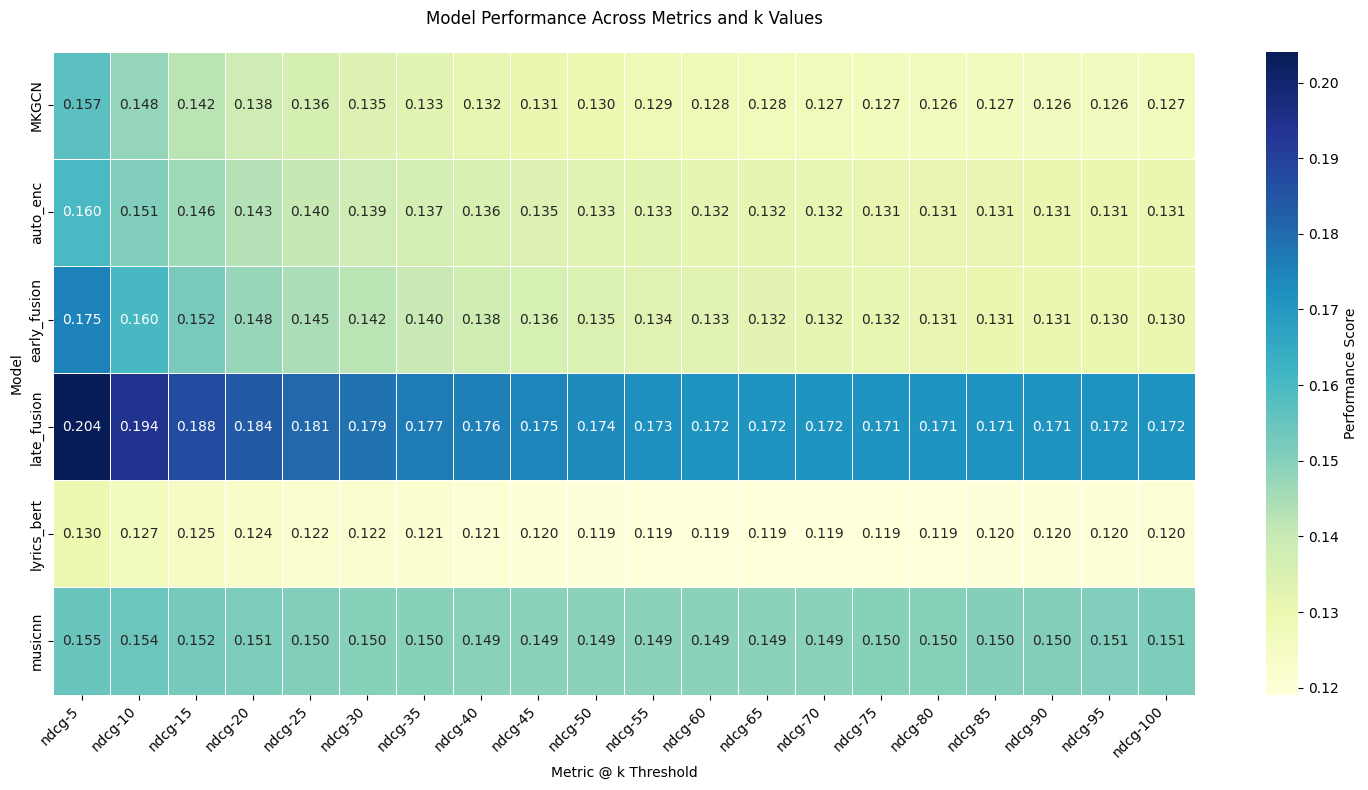

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data in wide format
heatmap_df = df.melt(id_vars=['model', 'threshold'], 
                    value_vars=['ndcg'],
                    var_name='metric').pivot_table(index='model',
                    columns=['metric', 'threshold'],
                    values='value')

# Fill NaN values (from precision@0) with 0
heatmap_df = heatmap_df.fillna(0)

# Sort columns by metric and threshold
heatmap_df = heatmap_df.sort_index(axis=1, level=[0,1])

# Create the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_df, 
            annot=True, 
            fmt=".3f",
            cmap="YlGnBu",
            linewidths=.5,
            cbar_kws={'label': 'Performance Score'})

# Customize labels
plt.title("Model Performance Across Metrics and k Values", pad=20)
plt.xlabel("Metric @ k Threshold")
plt.ylabel("Model")
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutoff
plt.tight_layout()
plt.show()

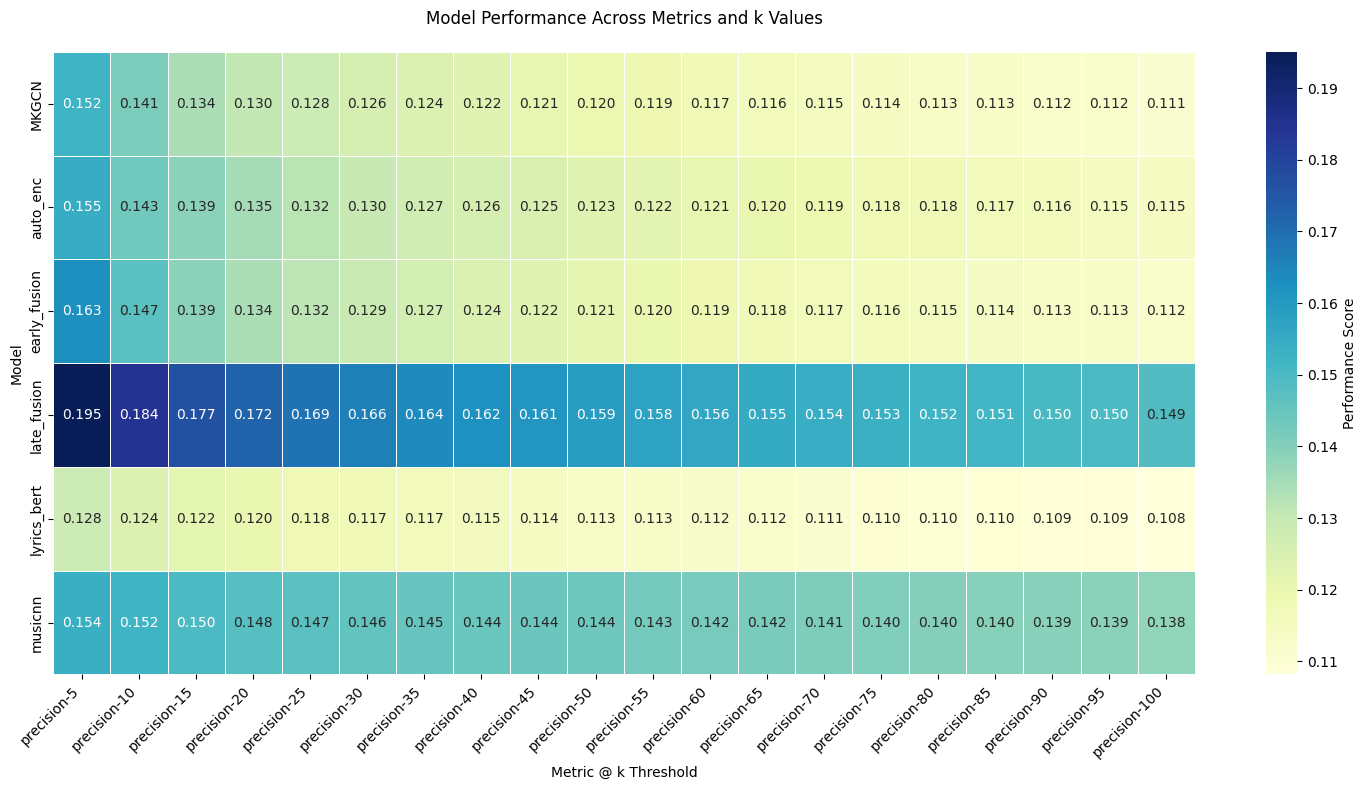

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data in wide format
heatmap_df = df.melt(id_vars=['model', 'threshold'], 
                    value_vars=['precision'],
                    var_name='metric').pivot_table(index='model',
                    columns=['metric', 'threshold'],
                    values='value')

# Fill NaN values (from precision@0) with 0
heatmap_df = heatmap_df.fillna(0)

# Sort columns by metric and threshold
heatmap_df = heatmap_df.sort_index(axis=1, level=[0,1])

# Create the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_df, 
            annot=True, 
            fmt=".3f",
            cmap="YlGnBu",
            linewidths=.5,
            cbar_kws={'label': 'Performance Score'})

# Customize labels
plt.title("Model Performance Across Metrics and k Values", pad=20)
plt.xlabel("Metric @ k Threshold")
plt.ylabel("Model")
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutoff
plt.tight_layout()
plt.show()

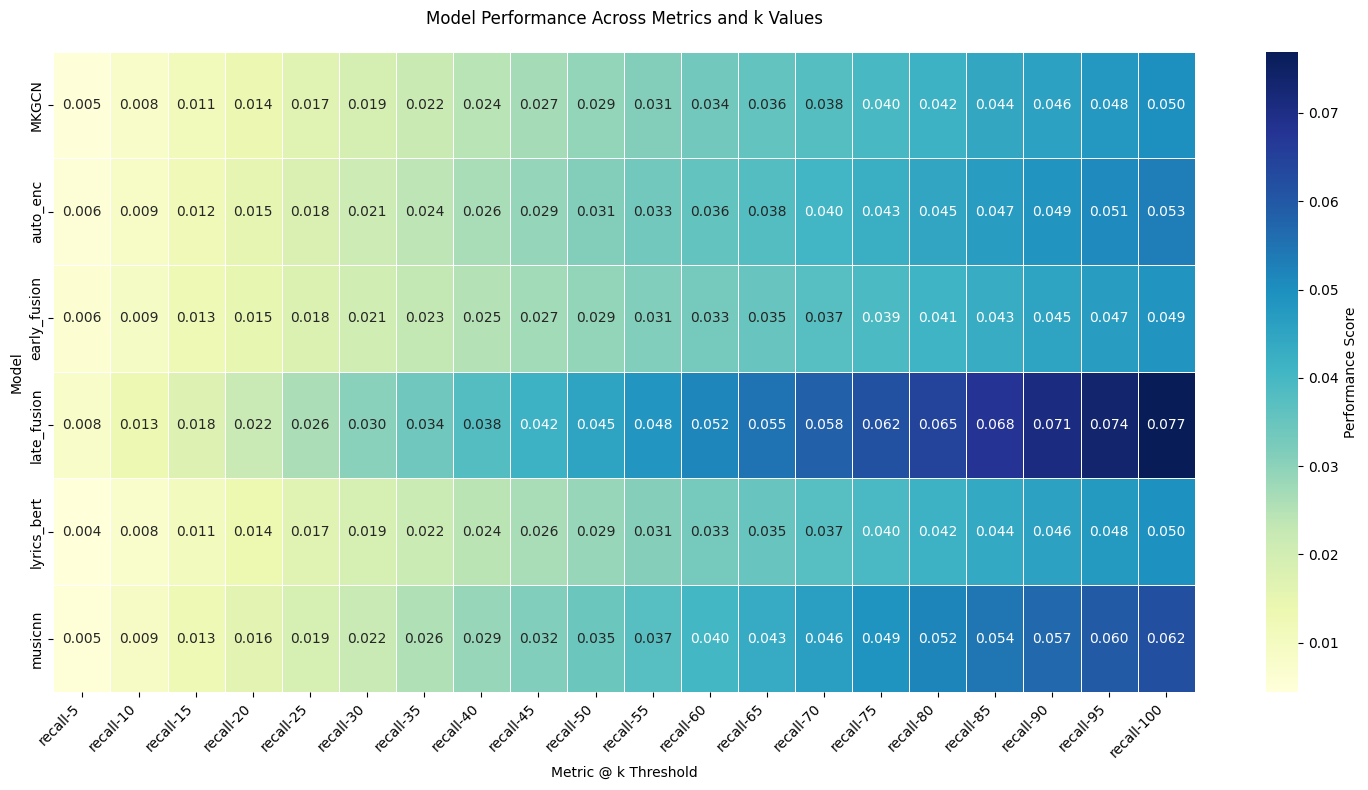

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data in wide format
heatmap_df = df.melt(id_vars=['model', 'threshold'], 
                    value_vars=['recall'],
                    var_name='metric').pivot_table(index='model',
                    columns=['metric', 'threshold'],
                    values='value')

# Fill NaN values (from precision@0) with 0
heatmap_df = heatmap_df.fillna(0)

# Sort columns by metric and threshold
heatmap_df = heatmap_df.sort_index(axis=1, level=[0,1])

# Create the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_df, 
            annot=True, 
            fmt=".3f",
            cmap="YlGnBu",
            linewidths=.5,
            cbar_kws={'label': 'Performance Score'})

# Customize labels
plt.title("Model Performance Across Metrics and k Values", pad=20)
plt.xlabel("Metric @ k Threshold")
plt.ylabel("Model")
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent cutoff
plt.tight_layout()
plt.show()

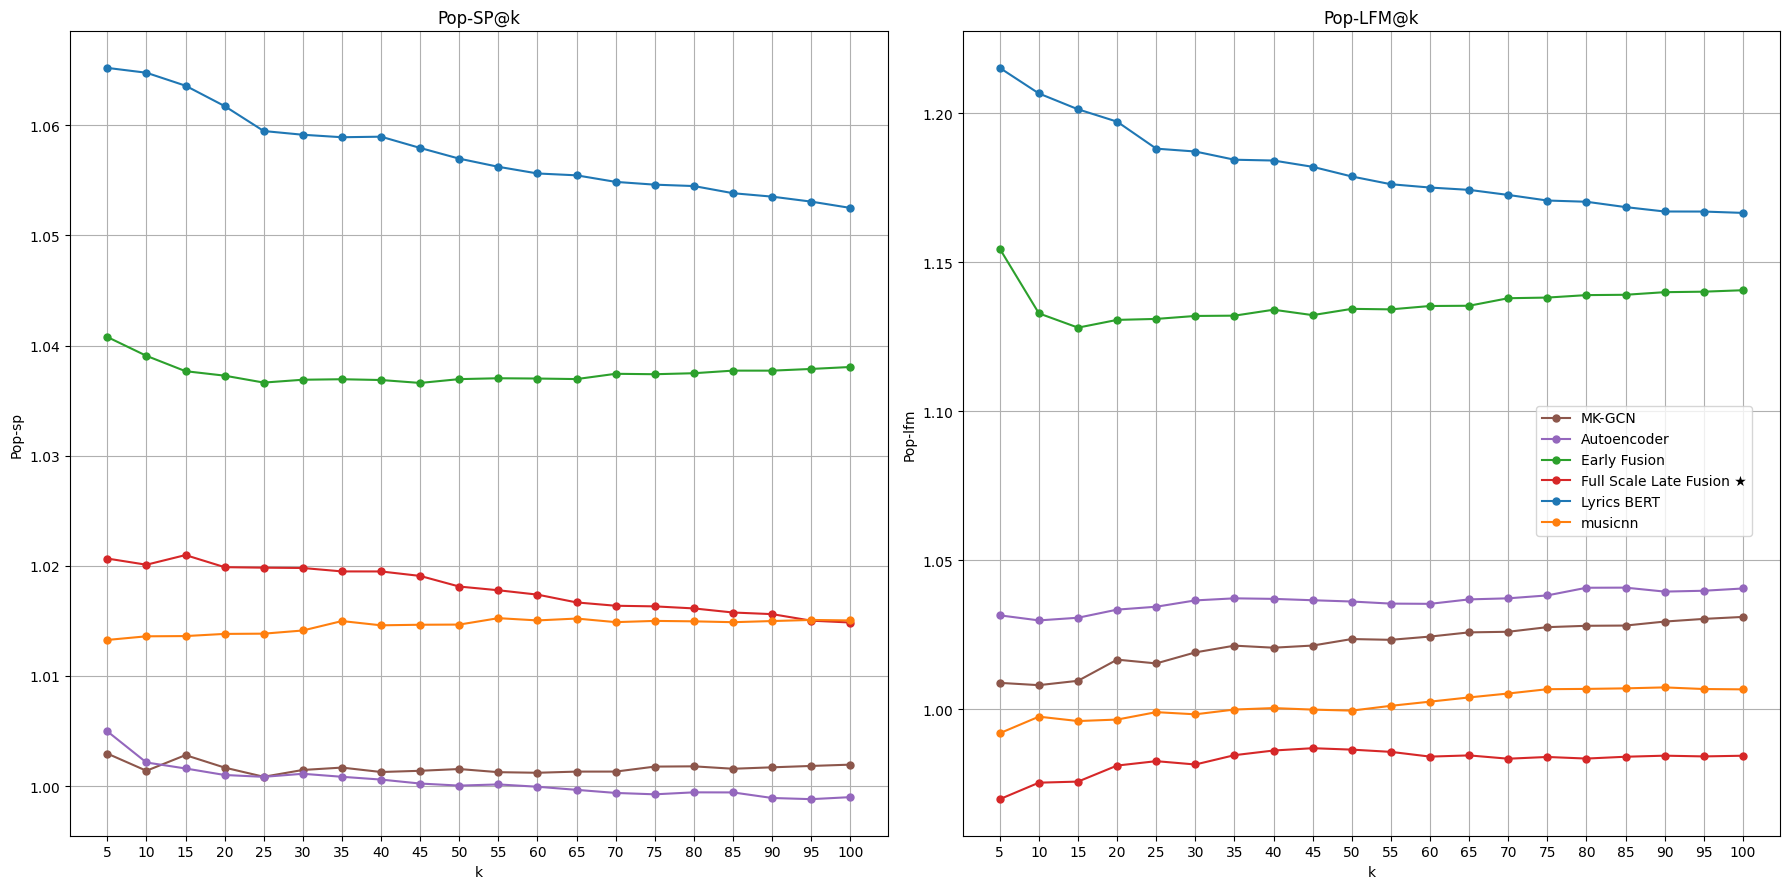

In [142]:
data = pd.read_csv("./results/base_beyond_all_k_th_0.csv")

columns = ["model", "threshold", "pop-sp",	"pop-lfm",	"cov",	"div"]
df = pd.DataFrame(data, columns=columns)

# Create 1x3 subplots for the three metrics
fig, axs = plt.subplots(1, 2, figsize=(18, 9))
metrics = ['pop-sp', 'pop-lfm'] #'ndcg']
titles = ['Pop-SP@k', 'Pop-LFM@k'] #'NDCG@k']

# Assign distinct colors to each model
models = df['model'].unique()
colors = plt.cm.tab10.colors[:len(models)]
model_color = {model: colors[i] for i, model in enumerate(models)}

# Plot each metric in its subplot
for i, metric in enumerate(metrics):
    ax = axs[i]
    for model, group in df.groupby('model'):
        sorted_group = group.sort_values('threshold')
        ax.plot(sorted_group['threshold'], sorted_group[metric], 
                label=model_names.get(model, model), color=model_color[model], marker='o', markersize=5)
    
    ax.set_title(titles[i])
    ax.set_xlabel('k')
    ax.grid()
    ax.set_ylabel(metric.capitalize())
    ax.set_xticks(np.linspace(5, 100, 20, dtype=int))
    
    # Special handling for precision's NaN at k=0
    if metric == 'precision':
        ax.set_ylim(0, 0.2)  # Adjust based on your data range

# Add legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.98, 0.55))

plt.tight_layout()
plt.show()

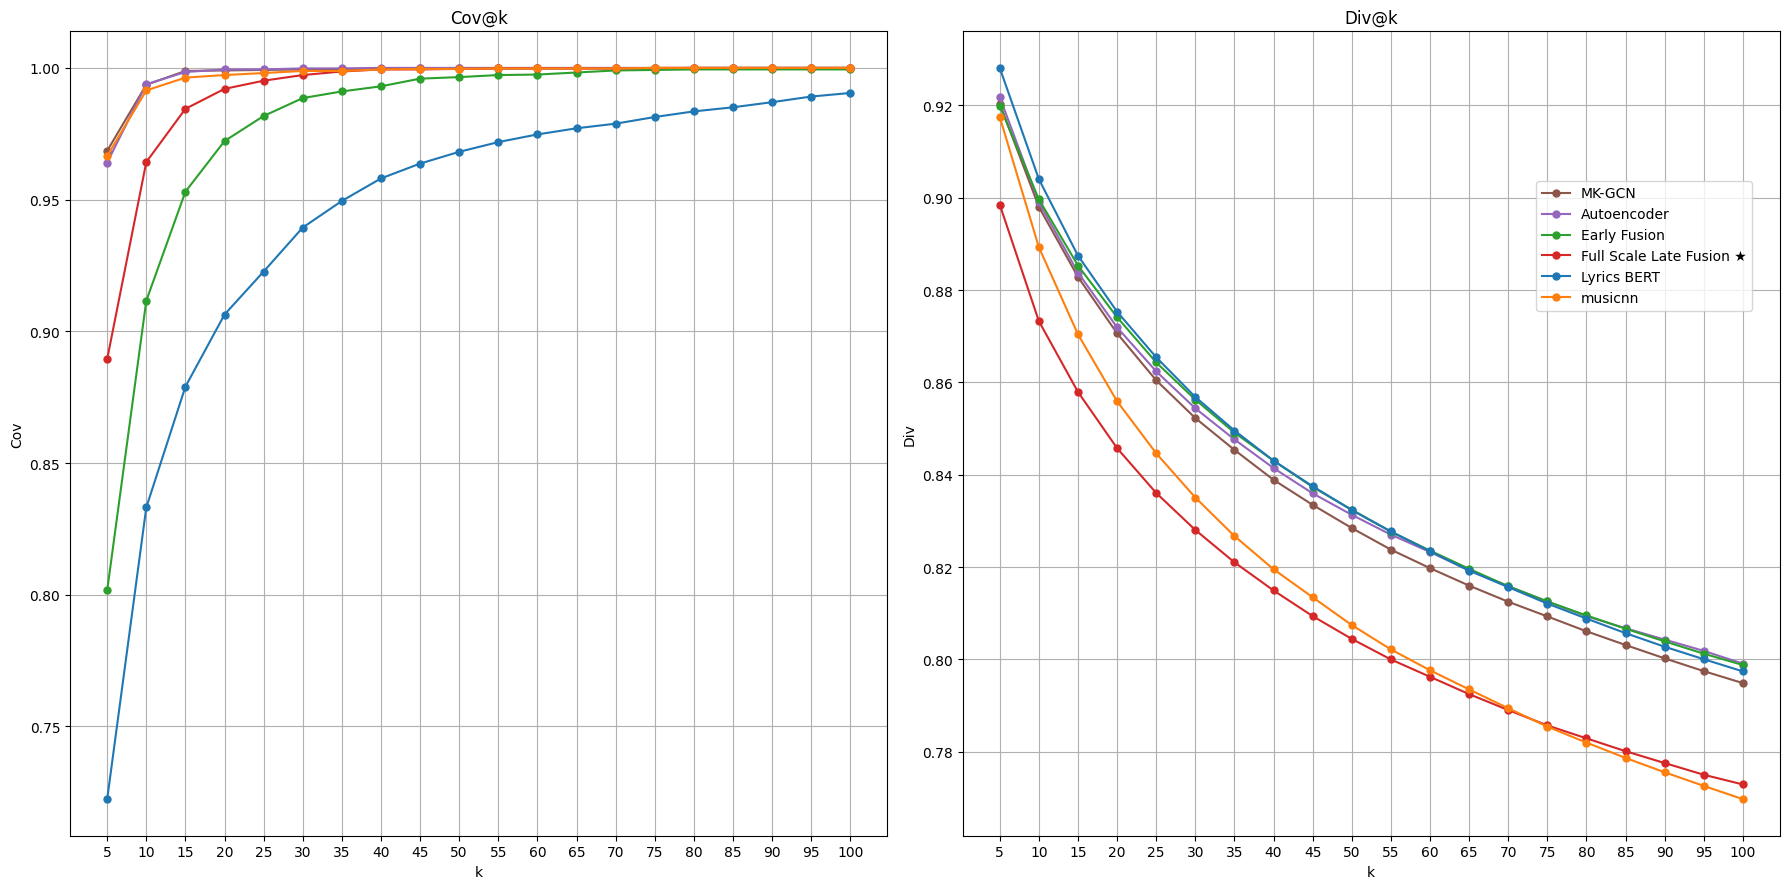

In [143]:
data = pd.read_csv("./results/base_beyond_all_k_th_0.csv")

columns = ["model", "threshold", "pop-sp",	"pop-lfm",	"cov",	"div"]
df = pd.DataFrame(data, columns=columns)

# Create 1x3 subplots for the three metrics
fig, axs = plt.subplots(1, 2, figsize=(18, 9))
metrics = ['cov', 'div']
titles = ['Cov@k', 'Div@k']

# Assign distinct colors to each model
models = df['model'].unique()
colors = plt.cm.tab10.colors[:len(models)]
model_color = {model: colors[i] for i, model in enumerate(models)}

# Plot each metric in its subplot
for i, metric in enumerate(metrics):
    ax = axs[i]
    for model, group in df.groupby('model'):
        sorted_group = group.sort_values('threshold')
        ax.plot(sorted_group['threshold'], sorted_group[metric], 
                label=model_names.get(model, model), color=model_color[model], marker='o', markersize=5)
    
    ax.set_title(titles[i])
    ax.set_xlabel('k')
    ax.grid()
    ax.set_ylabel(metric.capitalize())
    ax.set_xticks(np.linspace(5, 100, 20, dtype=int))
    
    # Special handling for precision's NaN at k=0
    if metric == 'precision':
        ax.set_ylim(0, 0.2)  # Adjust based on your data range

# Add legend
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.98, 0.8))

plt.tight_layout()
plt.show()